<a href="https://colab.research.google.com/github/parksj0923/KORartilleryman/blob/master/osam_machine_learning/house_price_predict/house_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 초기 세팅

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train = pd.read_csv("train.csv")

In [6]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [7]:
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

columns중 숫자값만 있는 것들을 numeric에 넣을때


In [8]:
numeric = [f for f in df_train.columns if df_train.dtypes[f] !='object']

In [9]:
numeric.remove('Id')
numeric.remove('SalePrice')

In [10]:
categorical = [f for f in df_train.columns if df_train.dtypes[f] =='object']

## **Label확인**



.describe()는 원하는 값에 대한 여러 통계지표를 보여준다

실제 데이터는 값이 이상한 경우가 많다. 이럴경우를 대비해서 describe같은것들로 확인한다

In [11]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


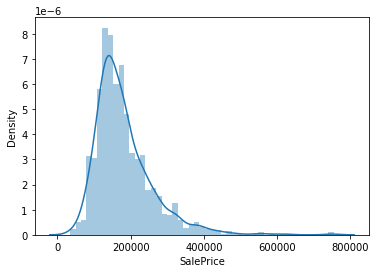

In [12]:
#histogram
sns.distplot(df_train['SalePrice'])

이를 통해 데이터에는 문제가 없다는 것을 알게됐음

## **Label 과 feature들간 상관관계 파악하기**

## (1) numeric

GrLivArea: Above grade (ground) living area square feet

GrLivArea와 SalePrice와 어떤상관관계가 있는지 보겠다는 것

In [13]:
var = "GrLivArea"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis =1)

In [14]:
data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


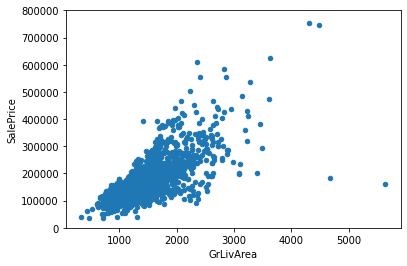

In [19]:
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

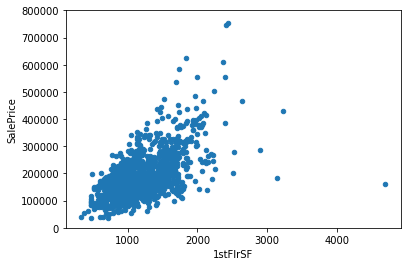

In [23]:
var = "1stFlrSF"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis =1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

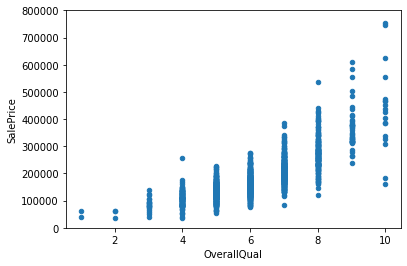

In [24]:
var = "OverallQual"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis =1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## (2) categorical

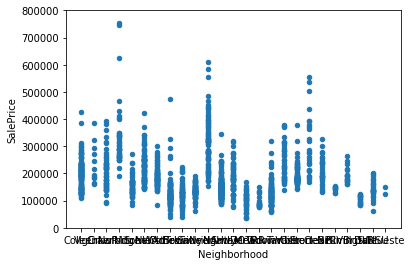

In [30]:
var = "Neighborhood"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis =1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

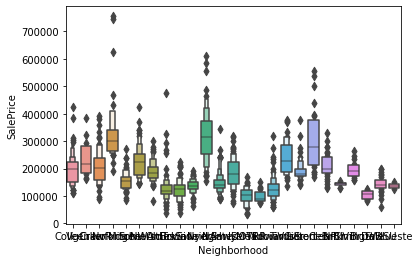

In [31]:
sns.boxenplot(x=var,y='SalePrice',data=data)

이 히스토그램은 데이터들을 좀더 분석하기 좋게 표시한 것이다.

여기서 박스의 가운데 값은 메디안, 박스 안에 있는게 신뢰할 만한 데이터 포인트들이다.

박스의 높이는 IQR에 의해 정해지는데, 여기서 IQR이란 상위25, 하위25% 사이의 거리를 의미한다.

박스의 끝은 IQR의 끝점에서 IQR +- 1.5*IQR이다


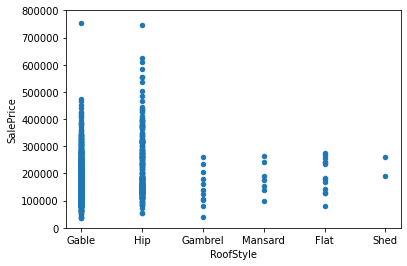

In [33]:
var = "RoofStyle"
data = pd.concat([df_train['SalePrice'], df_train[var]], axis =1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

roof style의 경우 앞의 2개가 비슷비슷하고, 뒤의 4개가 비슷비슷하다.

이는 정보력이 좋은 feature가 아니다

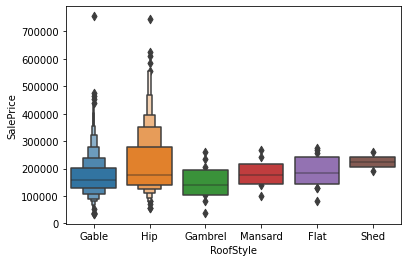

In [34]:
sns.boxenplot(x=var,y='SalePrice',data=data)

## 전체적으로 파악하려면 어떻게?

특정 feature와 saleprice간의 상관관계는 correlation으로 나타낼수있다

In [36]:
df_train['GrLivArea'].corr(df_train['SalePrice'])

0.8147023945653726

In [41]:
#전체 feature에 대해서 correlation을 구할 수 있음
#일단 이걸 사용하면 숫자값인 feature만 나오고 object(문자열)는 나오지 않는다
corrmat = df_train.corr()

In [39]:

corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.250193,-0.444778,-0.421662,-0.472934,0.369326,-0.417004,-0.427833,-0.498978,-0.369610,0.151407,-0.313003,-0.464534,-0.464053,-0.133054,0.179593,-0.447517,-0.245579,0.168089,-0.425698,-0.267006,-0.089526,0.311685,-0.364321,-0.505840,-0.404859,-0.452911,-0.458554,-0.479561,-0.440406,0.378302,-0.155918,-0.036908,0.029225,0.253435,0.058260,0.182047,-0.491504
MSSubClass,0.250193,1.000000,-0.775180,-0.794259,-0.372607,0.265247,-0.336199,-0.283400,-0.402313,-0.639189,-0.232294,-0.270529,-0.691325,-0.711920,0.472877,0.354151,-0.240623,-0.538614,0.088271,-0.180463,0.307812,0.205915,0.612995,-0.090631,-0.565341,-0.271759,-0.407807,-0.471659,-0.460937,-0.315098,0.288631,-0.211312,-0.218599,-0.314299,0.250154,0.060170,0.106038,-0.451729
LotFrontage,-0.444778,-0.775180,1.000000,0.899459,0.753473,-0.663974,0.638360,0.600887,0.788774,0.672679,-0.212781,0.616698,0.883835,0.922457,0.084612,-0.419967,0.769310,0.444916,-0.448429,0.680524,0.255669,0.253381,-0.520674,0.653845,0.894122,0.600368,0.765547,0.799592,0.719783,0.719982,-0.538321,-0.000175,0.079693,0.331916,-0.538623,-0.086779,-0.423008,0.820117
LotArea,-0.421662,-0.794259,0.899459,1.000000,0.515920,-0.431608,0.420947,0.359336,0.582890,0.708493,0.096702,0.296102,0.742940,0.787260,-0.112443,-0.350170,0.535892,0.560561,-0.231926,0.400869,0.033112,0.096368,-0.477535,0.412667,0.785183,0.358346,0.539477,0.589742,0.628022,0.482355,-0.368387,-0.018051,0.181909,0.390494,-0.376266,-0.140159,-0.300621,0.614529
OverallQual,-0.472934,-0.372607,0.753473,0.515920,1.000000,-0.901229,0.958908,0.962464,0.978116,0.623969,-0.583176,0.767420,0.897107,0.878229,0.319598,-0.641171,0.880761,0.387252,-0.635160,0.947467,0.628483,0.173383,-0.635868,0.733669,0.882817,0.958085,0.992910,0.985160,0.880369,0.939548,-0.870761,-0.045656,-0.128070,-0.044296,-0.688556,-0.008173,-0.476230,0.991571
OverallCond,0.369326,0.265247,-0.663974,-0.431608,-0.901229,1.000000,-0.914485,-0.867188,-0.895179,-0.579072,0.540745,-0.713124,-0.833288,-0.815519,-0.236011,0.597787,-0.778167,-0.391608,0.680129,-0.884884,-0.524927,-0.121935,0.445640,-0.648713,-0.743665,-0.916700,-0.919496,-0.910840,-0.779892,-0.825358,0.822414,0.041921,0.222477,0.038446,0.634912,0.001687,0.413695,-0.888703
YearBuilt,-0.417004,-0.336199,0.638360,0.420947,0.958908,-0.914485,1.000000,0.985237,0.931018,0.686205,-0.517226,0.650445,0.877152,0.833078,0.147351,-0.746489,0.728864,0.506330,-0.602366,0.867299,0.527594,-0.058999,-0.693562,0.546005,0.775597,0.994737,0.970625,0.964848,0.888000,0.866033,-0.946252,0.026208,-0.202058,-0.112135,-0.651107,-0.027424,-0.359975,0.939947
YearRemodAdd,-0.427833,-0.283400,0.600887,0.359336,0.962464,-0.867188,0.985237,1.000000,0.914524,0.604329,-0.582617,0.692799,0.833955,0.789208,0.230260,-0.701530,0.750028,0.413137,-0.605684,0.889961,0.585214,0.001792,-0.679210,0.584087,0.752033,0.991199,0.960897,0.947793,0.864620,0.882504,-0.924580,0.017367,-0.233218,-0.160047,-0.646730,-0.017166,-0.367180,0.932532
MasVnrArea,-0.498978,-0.402313,0.788774,0.582890,0.978116,-0.895179,0.931018,0.914524,1.000000,0.680772,-0.542518,0.713405,0.910410,0.899275,0.292479,-0.652975,0.879116,0.439800,-0.591480,0.916755,0.600870,0.176301,-0.610029,0.729954,0.911467,0.918892,0.977377,0.975936,0.883711,0.903224,-0.849407,-0.049791,-0.077016,-0.009519,-0.682871,-0.052410,-0.457720,0.985615
BsmtFinSF1,-0.369610,-0.639189,0.672679,0.708493,0.623969,-0.579072,0.686205,0.604329,0.680772,1.000000,0.045108,0.093272,0.826501,0.800211,-0.363104,-0.678351,0.371092,0.941550,-0.308541,0.391827,0.011727,-0.411400,-0.743753,0.129369,0.717388,0.618774,0.665352,0.714707

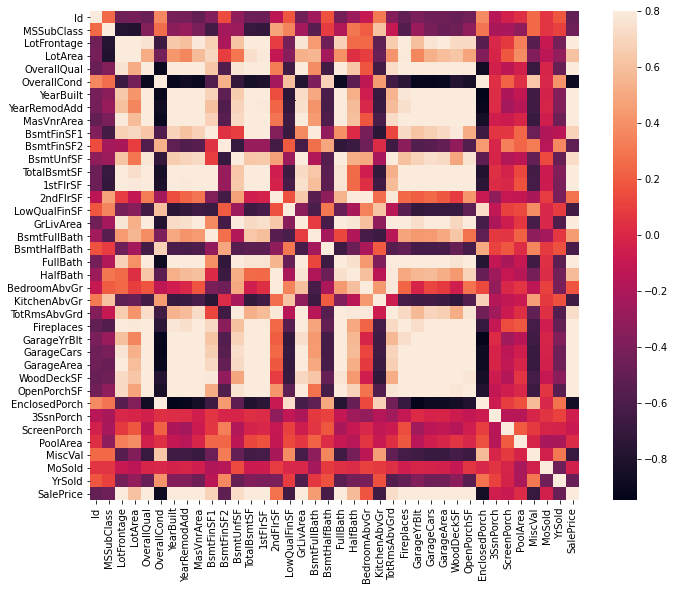

In [42]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square = True)

여기서 흰색일수록 상관관계가 높으니까 중요한 것임

이때, 맨 밑줄의 SalePrice를 보면 흰색애들이 예측할 가격에 연관성이 높은 중요한 놈들임



In [44]:
corrmat['SalePrice']

Id              -0.491504
MSSubClass      -0.451729
LotFrontage      0.820117
LotArea          0.614529
OverallQual      0.991571
OverallCond     -0.888703
YearBuilt        0.939947
YearRemodAdd     0.932532
MasVnrArea       0.985615
BsmtFinSF1       0.687397
BsmtFinSF2      -0.517148
BsmtUnfSF        0.732331
TotalBsmtSF      0.931025
1stFlrSF         0.920579
2ndFlrSF         0.279561
LowQualFinSF    -0.641013
GrLivArea        0.887965
BsmtFullBath     0.450509
BsmtHalfBath    -0.617815
FullBath         0.925577
HalfBath         0.586335
BedroomAbvGr     0.174275
KitchenAbvGr    -0.648999
TotRmsAbvGrd     0.734771
Fireplaces       0.927470
GarageYrBlt      0.929110
GarageCars       0.988851
GarageArea       0.989541
WoodDeckSF       0.902697
OpenPorchSF      0.930747
EnclosedPorch   -0.853739
3SsnPorch       -0.051665
ScreenPorch     -0.081099
PoolArea         0.022275
MiscVal         -0.689564
MoSold          -0.037534
YrSold          -0.476487
SalePrice        1.000000
Name: SalePr

In [48]:
corrmat.sort_values(by=['SalePrice'],ascending=False)['SalePrice']

SalePrice        1.000000
OverallQual      0.991571
GarageArea       0.989541
GarageCars       0.988851
MasVnrArea       0.985615
YearBuilt        0.939947
YearRemodAdd     0.932532
TotalBsmtSF      0.931025
OpenPorchSF      0.930747
GarageYrBlt      0.929110
Fireplaces       0.927470
FullBath         0.925577
1stFlrSF         0.920579
WoodDeckSF       0.902697
GrLivArea        0.887965
LotFrontage      0.820117
TotRmsAbvGrd     0.734771
BsmtUnfSF        0.732331
BsmtFinSF1       0.687397
LotArea          0.614529
HalfBath         0.586335
BsmtFullBath     0.450509
2ndFlrSF         0.279561
BedroomAbvGr     0.174275
PoolArea         0.022275
MoSold          -0.037534
3SsnPorch       -0.051665
ScreenPorch     -0.081099
MSSubClass      -0.451729
YrSold          -0.476487
Id              -0.491504
BsmtFinSF2      -0.517148
BsmtHalfBath    -0.617815
LowQualFinSF    -0.641013
KitchenAbvGr    -0.648999
MiscVal         -0.689564
EnclosedPorch   -0.853739
OverallCond     -0.888703
Name: SalePr

# Todo
  데이터 전처리 
  
  1.Categorical data processing

  2.Missing data

  3.Change distribution of the label